# Tennis analysis

### Question or problem definition

We want to see if we can create a prediction model that can predict whether a player will win a match or not, based on different statistics

### Acquire training and testing data

import librairies :

In [2]:
# dataframe manipulation
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Acquire data from csv :

We want to collect a list of matches with the following information :
- match_id
- date
- surface
- best_of (3 sets win => best_of = 5)
- winner_rank
- loser_rank
- winner_rank_points
- loser_rank_points
- winner_elo_rating
- loser_elo_rating
- winner_age
- loser_age
- winner_height
- loser_height

>SELECT match_id, date, surface, best_of, winner_rank, loser_rank, winner_rank_points, loser_rank_points, winner_elo_rating, loser_elo_rating, winner_age, loser_age, winner_height, loser_height FROM match;

We want to add stats before matches to it :

For example if we want to get aces from nadal given a date we have to do :
> SELECT AVG(ps.p_ace), AVG(ps.o_ace) FROM (SELECT p_matches, p_ace, o_matches, o_ace, match_id, date, player_id FROM player_match_stats_v WHERE player_id=4742 AND date <= '2016/01/01') ps;

final statement to get 2018 matches with their stats :

>SELECT pms.match_id, pms.date, pms.surface, pms.level, pms.round, pms.best_of, pms.player_id, pms.opponent_id, pms.player_rank, pms.opponent_rank, pms.player_elo_rating, pms.opponent_elo_rating, pms.player_age, pms.opponent_age, pms.player_height, pms.opponent_height, pms.outcome, pms.p_matches, pms.o_matches, pms.p_sets, pms.o_sets, pms.p_games, pms.o_games, pms.p_tbs, pms.o_tbs, pms.p_ace, pms.p_df, pms.p_sv_pt, pms.p_1st_in, pms.p_1st_won, pms.p_2nd_won, pms.p_sv_gms, pms.p_bp_sv, pms.p_bp_fc, pms.o_ace, pms.o_df, pms.o_sv_pt, pms.o_1st_in, pms.o_1st_won, pms.o_2nd_won, pms.o_sv_gms, pms.o_bp_sv, pms.o_bp_fc, pms.minutes, pms.p_upsets, pms.o_upsets, ps.p_avg_ace, ps.p_avg_df, ps.p_avg_sv_pt, ps.p_avg_1st_in, ps.p_avg_1st_won, ps.p_avg_2nd_won, ps.p_avg_sv_gms, ps.p_avg_bp_sv, ps.p_avg_bp_fc, ps.o_avg_ace, ps.o_avg_df, ps.o_avg_sv_pt, ps.o_avg_1st_in, ps.o_avg_1st_won, ps.o_avg_2nd_won, ps.o_avg_sv_gms, ps.o_avg_bp_sv, ps.o_avg_bp_fc FROM player_match_stats_v pms LEFT JOIN LATERAL (SELECT ROUND(AVG(p_ace), 2) p_avg_ace, ROUND(AVG(p_df), 2) p_avg_df, ROUND(AVG(p_sv_pt), 2) p_avg_sv_pt, ROUND(AVG(p_1st_in), 2) p_avg_1st_in, ROUND(AVG(p_1st_won), 2) p_avg_1st_won, ROUND(AVG(p_2nd_won), 2) p_avg_2nd_won, ROUND(AVG(p_sv_gms), 2) p_avg_sv_gms, ROUND(AVG(p_bp_sv), 2) p_avg_bp_sv, ROUND(AVG(p_bp_fc), 2) p_avg_bp_fc, ROUND(AVG(o_ace), 2) o_avg_ace, ROUND(AVG(o_df), 2) o_avg_df, ROUND(AVG(o_sv_pt), 2) o_avg_sv_pt, ROUND(AVG(o_1st_in), 2) o_avg_1st_in, ROUND(AVG(o_1st_won), 2) o_avg_1st_won, ROUND(AVG(o_2nd_won), 2) o_avg_2nd_won, ROUND(AVG(o_sv_gms), 2) o_avg_sv_gms, ROUND(AVG(o_bp_sv), 2) o_avg_bp_sv, ROUND(AVG(o_bp_fc), 2) o_avg_bp_fc, player_id FROM player_match_stats_v WHERE date <= pms.date GROUP BY player_id) ps ON (pms.player_id=ps.player_id) WHERE pms.date >= '2018-01-01' AND pms.date <='2018-12-31';

In [3]:
tennis = pd.read_csv('2018 matches/matches.csv', delimiter=';')

In [4]:
tennis.shape

(5886, 64)

When we checked in the database we had only 2974 matches in 2018, we found it odd to have almost twice more data

In [5]:
tennis[tennis['match_id'] == 166985]

,match_id,date,surface,level,round,best_of,player_id,opponent_id,player_rank,opponent_rank,...,p_avg_bp_fc,o_avg_ace,o_avg_df,o_avg_sv_pt,o_avg_1st_in,o_avg_1st_won,o_avg_2nd_won,o_avg_sv_gms,o_avg_bp_sv,o_avg_bp_fc
0,166985,06/04/2018,C,D,RR,3,6030,11769,87.0,64.0,...,7.58,6.20,2.6,76.18,46.70,33.05,14.95,12.28,3.33,6.03
390,166985,06/04/2018,C,D,RR,3,11769,6030,64.0,87.0,...,6.85,5.12,3.7,85.24,51.61,38.42,18.42,13.55,3.88,5.94


We can see that we have 2 match stats rows for a single match.

In [6]:
tennis['match_id'].nunique()

2943

That's the number of matches in 2018, so we want to drop duplicates.

In [7]:
tennis_non_duplicates = tennis.drop_duplicates(subset='match_id')

In [8]:
tennis_non_duplicates.shape

(2943, 64)

Once duplicates have been dropped, we can see that we have 2943 matches available for our analysis.

Let's save that to a new csv file :

In [9]:
tennis_non_duplicates.to_csv('2018 matches/non_duplicates_tennis_matches.csv', index=False)

In [10]:
tm_stats = pd.read_csv('2018 matches/non_duplicates_tennis_matches.csv')

In [11]:
tm_stats.head()

,match_id,date,surface,level,round,best_of,player_id,opponent_id,player_rank,opponent_rank,...,p_avg_bp_fc,o_avg_ace,o_avg_df,o_avg_sv_pt,o_avg_1st_in,o_avg_1st_won,o_avg_2nd_won,o_avg_sv_gms,o_avg_bp_sv,o_avg_bp_fc
0,166985,06/04/2018,C,D,RR,3,6030,11769,87.0,64.0,...,7.58,6.20,2.60,76.18,46.70,33.05,14.95,12.28,3.33,6.03
1,167084,09/04/2018,C,B,R32,3,6364,6196,26.0,65.0,...,6.69,7.55,3.74,82.57,49.97,36.63,16.29,12.95,4.18,6.77
2,167085,09/04/2018,C,B,R32,3,5420,4311,93.0,62.0,...,9.05,6.82,3.03,85.92,50.68,36.20,17.91,13.09,4.97,7.82
3,167086,09/04/2018,C,B,R32,3,4291,5902,91.0,61.0,...,7.98,7.96,3.22,80.63,48.48,35.95,16.59,12.79,4.20,6.56
4,167087,09/04/2018,C,B,R32,3,4994,3893,55.0,57.0,...,7.27,5.12,2.70,77.29,48.82,34.54,14.85,12.05,3.75,6.16


We acquired the data needed for our analysis !

Now we need to split it in train and test datasets :

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
tm_stats_train, tm_stats_test = train_test_split(tm_stats)

In [14]:
print("train shape : ", tm_stats_train.shape)
print("train test : ", tm_stats_test.shape)

train shape :  (2207, 64)
train test :  (736, 64)


Save those to csv :

In [15]:
tm_stats_train.to_csv('2018 matches/tennis_matches_stats_train.csv', index=False)
tm_stats_test.to_csv('2018 matches/tennis_matches_stats_test.csv', index=False)

Declare new dataframes :

In [16]:
tm_stats_train = pd.read_csv('2018 matches/tennis_matches_stats_train.csv')
tm_stats_test = pd.read_csv('2018 matches/tennis_matches_stats_test.csv')

### Wrangle, prepare and cleanse data

#### Analyse by desribing data

>Describe data to see which features are available

In [17]:
print(tm_stats_train.columns.values)

['match_id' 'date' 'surface' 'level' 'round' 'best_of' 'player_id'
 'opponent_id' 'player_rank' 'opponent_rank' 'player_elo_rating'
 'opponent_elo_rating' 'player_age' 'opponent_age' 'player_height'
 'opponent_height' 'outcome' 'p_matches' 'o_matches' 'p_sets' 'o_sets'
 'p_games' 'o_games' 'p_tbs' 'o_tbs' 'p_ace' 'p_df' 'p_sv_pt' 'p_1st_in'
 'p_1st_won' 'p_2nd_won' 'p_sv_gms' 'p_bp_sv' 'p_bp_fc' 'o_ace' 'o_df'
 'o_sv_pt' 'o_1st_in' 'o_1st_won' 'o_2nd_won' 'o_sv_gms' 'o_bp_sv'
 'o_bp_fc' 'minutes' 'p_upsets' 'o_upsets' 'p_avg_ace' 'p_avg_df'
 'p_avg_sv_pt' 'p_avg_1st_in' 'p_avg_1st_won' 'p_avg_2nd_won'
 'p_avg_sv_gms' 'p_avg_bp_sv' 'p_avg_bp_fc' 'o_avg_ace' 'o_avg_df'
 'o_avg_sv_pt' 'o_avg_1st_in' 'o_avg_1st_won' 'o_avg_2nd_won'
 'o_avg_sv_gms' 'o_avg_bp_sv' 'o_avg_bp_fc']


>Classify those to see which feature is categorical and which is numerical

In [18]:
tm_stats_train.head()

,match_id,date,surface,level,round,best_of,player_id,opponent_id,player_rank,opponent_rank,...,p_avg_bp_fc,o_avg_ace,o_avg_df,o_avg_sv_pt,o_avg_1st_in,o_avg_1st_won,o_avg_2nd_won,o_avg_sv_gms,o_avg_bp_sv,o_avg_bp_fc
0,169007,31/12/2018,H,B,R32,3,5918,5070,21.0,65.0,...,7.84,7.52,3.04,78.41,47.22,33.73,15.56,12.36,4.44,7.19
1,166856,05/03/2018,H,M,R64,3,5166,5159,23.0,134.0,...,7.32,7.07,3.13,78.16,46.95,33.65,15.54,12.28,3.95,6.72
2,166516,05/02/2018,H,B,R32,3,5364,45397,147.0,1529.0,...,8.10,6.29,2.90,78.68,48.57,34.68,14.71,12.44,4.27,7.18
3,167323,30/04/2018,C,B,SF,3,644,11176,3.0,22.0,...,6.36,4.79,2.97,81.01,49.41,35.00,15.72,12.85,3.94,6.99
4,167296,30/04/2018,C,B,SF,3,4291,11485,78.0,110.0,...,7.88,7.77,3.27,79.97,48.14,35.54,16.33,12.69,4.21,6.62


Categorical variables are :
- Nominal :
    - surface
- Ordinal
    - level
    - p_matches, o_matches
    
Numerical variables are :
- Discrete :
    - best_of
    - player_id, opponent_id
    - player_rank, opponent_rank
    - p_sets, o_sets
    - p_games, o_games
    - p_tbs, o_tbs

- Continuous : 
    - player_elo_rating, opponent_elo_rating
    - player_age, opponent_age
    - player_height, opponent_height
    - p_ace, o_ace
    - p_df, o_df
    - p_sv_pt, o_sv_pt
    - p_1st_in, o_1st_in
    - p_1st_won, o_1st_won
    - p_2nd_won, o_2nd_won
    - p_sv_gms, o_sv_gms
    - p_bp_sv, o_bp_sv
    - p_bp_fc, o_bp_fc
    - minutes
    - p_upsets, o_upsets
    - p_avg_ace, o_avg_ace
    - p_avg_df, o_avg_df
    - p_avg_sv_pt, o_sv_pt
    - p_avg_1st_in, o_avg_1st_in
    - p_avg_1st_won, o_avg_1st_won
    - p_avg_2nd_won, o_avg_2nd_won
    - p_avg_sv_gms, o_avg_sv_gms
    - p_avg_bp_sv, o_avg_bp_sv
    - p_avg_bp_fc, o_avg_bp_fc

Mixed types :
- round
- date
- outcome

In [19]:
tm_stats_train.info()
print('-'*40)
tm_stats_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 64 columns):
match_id               2207 non-null int64
date                   2207 non-null object
surface                2207 non-null object
level                  2207 non-null object
round                  2207 non-null object
best_of                2207 non-null int64
player_id              2207 non-null int64
opponent_id            2207 non-null int64
player_rank            2202 non-null float64
opponent_rank          2190 non-null float64
player_elo_rating      2207 non-null int64
opponent_elo_rating    2207 non-null int64
player_age             2207 non-null float64
opponent_age           2204 non-null float64
player_height          1461 non-null float64
opponent_height        1326 non-null float64
outcome                56 non-null object
p_matches              2207 non-null int64
o_matches              2207 non-null int64
p_sets                 2207 non-null int64
o_sets            

Features that may contain blank, null or empty values :
- train :
    - player_height, opponent_height (34 %)
    - outcome (a lot missing but normal because it's only when there is a walkover)
    - a few misssing :
        - opponent_age (3 missing)
        - player_rank, opponent_rank
        - p_ace, o_ace
        - p_df, o_df
        - p_sv_pt, o_sv_pt
        - p_1st_in, o_1st_in
        - p_1st_won, o_1st_won
        - p_2nd_won, o_2nd_won
        - p_sv_gms, o_sv_gms
        - p_bp_sv, o_bp_sv
        - p_bp_fc, o_bp_fc
        - p_avg_ace, o_avg_ace
        - p_avg_df, o_avg_df
        - p_avg_sv_pt, o_sv_pt
        - p_avg_1st_in, o_avg_1st_in
        - p_avg_1st_won, o_avg_1st_won
        - p_avg_2nd_won, o_avg_2nd_won
        - p_avg_sv_gms, o_avg_sv_gms
        - p_avg_bp_sv, o_avg_bp_sv
        - p_avg_bp_fc, o_avg_bp_fc
- test :
    - player_height, opponent_height (34 %)
    - outcome (a lot missing but normal because it's only when there is a walkover)
    - a few misssing :
        - opponent_age (3 missing)
        - player_rank, opponent_rank
        - p_ace, o_ace
        - p_df, o_df
        - p_sv_pt, o_sv_pt
        - p_1st_in, o_1st_in
        - p_1st_won, o_1st_won
        - p_2nd_won, o_2nd_won
        - p_sv_gms, o_sv_gms
        - p_bp_sv, o_bp_sv
        - p_bp_fc, o_bp_fc
        - p_avg_ace, o_avg_ace
        - p_avg_df, o_avg_df
        - p_avg_sv_pt, o_sv_pt
        - p_avg_1st_in, o_avg_1st_in
        - p_avg_1st_won, o_avg_1st_won
        - p_avg_2nd_won, o_avg_2nd_won
        - p_avg_sv_gms, o_avg_sv_gms
        - p_avg_bp_sv, o_avg_bp_sv
        - p_avg_bp_fc, o_avg_bp_fc

Verify how representative is training dataset

In [20]:
tm_stats_train[['date', 'surface', 'level', 'round', 'best_of', 'player_rank', 'opponent_rank', 'player_elo_rating',
       'opponent_elo_rating', 'player_age', 'opponent_age', 'player_height',
       'opponent_height', 'outcome', 'p_matches', 'o_matches', 'p_sets',
       'o_sets']].describe()

,best_of,player_rank,opponent_rank,player_elo_rating,opponent_elo_rating,player_age,opponent_age,player_height,opponent_height,p_matches,o_matches,p_sets,o_sets
count,2207.000000,2202.000000,2190.000000,2207.000000,2207.000000,2207.000000,2204.000000,1461.000000,1326.000000,2207.000000,2207.000000,2207.000000,2207.000000
mean,3.380607,83.524977,119.138356,1949.496602,1879.265972,27.702159,27.644067,186.802190,186.133484,0.999547,0.000453,2.157680,0.427730
std,0.785259,149.899893,204.368326,179.698543,154.436872,4.683432,4.729989,7.767329,7.199862,0.021286,0.021286,0.433798,0.566607
min,3.000000,1.000000,1.000000,1463.000000,1455.000000,14.940000,14.530000,163.000000,163.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,21.000000,37.000000,1839.500000,1787.000000,23.750000,24.087500,183.000000,183.000000,1.000000,0.000000,2.000000,0.000000
50%,3.000000,49.000000,69.000000,1924.000000,1882.000000,28.070000,27.800000,185.000000,185.000000,1.000000,0.000000,2.000000,0.000000
75%,3.000000,89.000000,113.000000,2048.000000,1958.000000,31.190000,30.920000,190.000000,190.000000,1.000000,0.000000,2.000000,1.000000
max,5.000000,1770.000000,1902.000000,2472.000000,2473.000000,39.838467,39.420000,208.000000,208.000000,1.000000,1.000000,3.000000,2.000000


In [21]:
tm_stats_train[tm_stats_train['level']  == 'G']['match_id'].count()

372

Matches in the dataset belong to tournaments that have a minimum level of ATP 250 (We only have one year data so we only have 383 that are matches from Grand Slams):
- It seems reasonable to have an average of 83.2 and 116.1 for player_rank
- Same for elo rating
- It is normal to see player_rank and player_elo_rating superior to opponent_rank, opponent_elo_rating because we deleted duplicates, so we kept only matches where the player who won is player and not opponent (we can see it with p_matches almost equal to 1 and p_sets > o_sets)
- We have a majority of Non Grand Slams tournaments, so it seems ok to have a 3.38 average for best_of

In [22]:
tm_stats_train[['p_games', 'o_games', 'p_tbs', 'o_tbs', 'p_ace', 'p_df',
       'p_sv_pt', 'p_1st_in', 'p_1st_won', 'p_2nd_won', 'p_sv_gms', 'p_bp_sv',
       'p_bp_fc', 'o_ace', 'o_df', 'o_sv_pt', 'o_1st_in', 'o_1st_won',
       'o_2nd_won', 'o_sv_gms']].describe()

,p_games,o_games,p_tbs,o_tbs,p_ace,p_df,p_sv_pt,p_1st_in,p_1st_won,p_2nd_won,p_sv_gms,p_bp_sv,p_bp_fc,o_ace,o_df,o_sv_pt,o_1st_in,o_1st_won,o_2nd_won,o_sv_gms
count,2207.000000,2207.000000,2207.000000,2207.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000
mean,14.896239,10.407793,0.386951,0.107386,7.430846,2.777070,79.483167,49.458599,37.670155,16.653321,12.797088,3.424932,4.935851,5.727934,3.429026,82.382166,49.910828,33.858508,15.124659,12.565059
std,3.985424,4.974504,0.581345,0.318335,5.812774,2.348821,29.382810,19.175658,13.880625,6.758256,4.321170,2.965521,3.936683,5.270874,2.531228,29.240507,19.058190,14.567830,7.138204,4.285350
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,11.000000,6.000000,1.000000,1.000000,2.000000
25%,12.000000,7.000000,0.000000,0.000000,3.000000,1.000000,57.000000,35.000000,28.000000,12.000000,10.000000,1.000000,2.000000,2.000000,2.000000,60.000000,36.000000,23.000000,10.000000,9.000000
50%,13.000000,10.000000,0.000000,0.000000,6.000000,2.000000,75.000000,46.000000,35.000000,16.000000,12.000000,3.000000,4.000000,4.000000,3.000000,77.000000,47.000000,32.000000,14.000000,11.000000
75%,18.000000,14.000000,1.000000,0.000000,10.000000,4.000000,96.000000,60.000000,45.000000,20.750000,15.000000,5.000000,7.000000,8.000000,5.000000,99.000000,60.000000,42.000000,19.000000,15.000000
max,35.000000,33.000000,3.000000,2.000000,64.000000,16.000000,225.000000,153.000000,117.000000,52.000000,34.000000,17.000000,25.000000,52.000000,18.000000,213.000000,150.000000,110.000000,50.000000,34.000000


In [23]:
tm_stats_train[['o_bp_sv', 'o_bp_fc', 'minutes', 'p_upsets',
       'o_upsets', 'p_avg_ace', 'p_avg_df', 'p_avg_sv_pt', 'p_avg_1st_in',
       'p_avg_1st_won', 'p_avg_2nd_won', 'p_avg_sv_gms', 'p_avg_bp_sv',
       'p_avg_bp_fc', 'o_avg_ace']].describe()

,o_bp_sv,o_bp_fc,minutes,p_upsets,o_upsets,p_avg_ace,p_avg_df,p_avg_sv_pt,p_avg_1st_in,p_avg_1st_won,p_avg_2nd_won,p_avg_sv_gms,p_avg_bp_sv,p_avg_bp_fc,o_avg_ace
count,2198.000000,2198.000000,2193.000000,2207.000000,2207.0,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,4.713376,8.372611,109.942544,0.356593,0.0,6.260231,3.020254,80.816290,49.208680,35.20868,16.182249,12.636825,4.105456,6.735351,6.012902
std,3.233827,4.073731,42.044471,0.479102,0.0,2.986929,0.896738,5.915411,4.388872,3.39313,1.934312,0.832128,0.743221,1.313880,1.449846
min,0.000000,0.000000,15.000000,0.000000,0.0,0.000000,0.000000,40.000000,22.000000,17.00000,7.930000,7.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000,78.000000,0.000000,0.0,4.050000,2.340000,78.030000,46.870000,33.27000,15.110000,12.230000,3.660000,5.980000,4.990000
50%,4.000000,8.000000,101.000000,0.000000,0.0,5.780000,2.910000,80.050000,48.580000,34.68000,15.960000,12.520000,4.090000,6.690000,5.880000
75%,7.000000,11.000000,135.000000,1.000000,0.0,7.790000,3.550000,82.980000,50.900000,36.77000,17.220000,12.980000,4.480000,7.540000,7.010000
max,20.000000,28.000000,356.000000,1.000000,0.0,19.750000,9.710000,132.000000,79.500000,52.00000,31.500000,21.000000,9.750000,15.500000,12.670000


In [24]:
tm_stats_train[['o_avg_df', 'o_avg_sv_pt', 'o_avg_1st_in',
       'o_avg_1st_won', 'o_avg_2nd_won', 'o_avg_sv_gms', 'o_avg_bp_sv',
       'o_avg_bp_fc']].describe()

,o_avg_df,o_avg_sv_pt,o_avg_1st_in,o_avg_1st_won,o_avg_2nd_won,o_avg_sv_gms,o_avg_bp_sv,o_avg_bp_fc
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,3.033673,80.735678,49.205719,35.098839,15.969401,12.624825,4.141274,6.871501
std,0.469706,5.345904,3.506980,3.128127,1.482209,0.827171,0.657397,1.117436
min,0.000000,45.000000,27.000000,12.000000,6.000000,7.000000,0.000000,2.750000
25%,2.800000,78.520000,47.510000,33.380000,15.240000,12.250000,3.810000,6.170000
50%,2.980000,80.430000,48.780000,34.910000,15.850000,12.530000,4.140000,6.860000
75%,3.150000,82.600000,50.570000,36.410000,16.620000,12.930000,4.460000,7.500000
max,6.500000,149.000000,89.000000,60.500000,31.000000,21.500000,12.000000,15.500000


All other statistics seem to be accurate with ultimatestatistics website

Here is the **worflow** we want to follow :
- **Classifying** : We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

- **Correlating** :  One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features. Converting. For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

- **Converting** : For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

- **Completing** : Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

- **Correcting** : We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

- **Creating** : Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

- **Charting** : How to select the right visualization plots and charts depending on nature of the data and the solution goals.

#### Assumptions based on data analysis
- Correlating :
    1. We want to know how well each feature correlates with Win (feature to create)
    
    
- Completing :
    1. We don't have to complete any feature
    
    
- Correcting :
    1. player_height, opponent_height may be dropped as they may not correlate strongly with Win and we have a lot of missing values
    2. match_id, player_id, opponent_id, date may be dropped as they doesn't contribute at all to Win
    

- Creating :
    1. We want to create Win feature 0 for loss and 1 for player victory
    2. We want to create rankdiff feature to have only one feature to avoid the model to give more weight to one player (check if we don't lose information when doing that), by doing difference we reduce the model variance
    3. We may want to create diff for all player statistics
    4. We may want to create a feature showing the performance of the player on his last matches (we need to be careful because depending on the player this feature could be biased), we can check what Knottenbelt did on this subject for his common opponent model using Markov chains.
    5. We may want to create a surface weighting feature that evaluate player on performance on past matches on the same surface (need to find a method)


- Classifying :
    1. We want to create ranges for player statistics

#### Create Win feature

In [25]:
tm_stats_train['p_matches'].value_counts()

1    2206
0       1
Name: p_matches, dtype: int64

In [26]:
tm_stats_train[tm_stats_train['p_matches'] == 0][['match_id', 'p_matches', 'o_matches']].head()

,match_id,p_matches,o_matches
1043,166985,0,1


In [27]:
tm_stats_train[['p_matches', 'o_matches']].isnull().sum()

p_matches    0
o_matches    0
dtype: int64

We don't have any missing values for p_matches and o_matches features, we can create the Win feature (1 if player won 0 else)

In [28]:
tm_stats_train['Win'] = tm_stats_train['p_matches'].apply(lambda x: 1 if x==1 else 0)

In [29]:
tm_stats_train['Win'].value_counts()

1    2206
0       1
Name: Win, dtype: int64

We created our Win feature, we can now pivote features to see the correlations :

#### Analyse by pivoting features

In [30]:
print(tm_stats_train.columns.values)

['match_id' 'date' 'surface' 'level' 'round' 'best_of' 'player_id'
 'opponent_id' 'player_rank' 'opponent_rank' 'player_elo_rating'
 'opponent_elo_rating' 'player_age' 'opponent_age' 'player_height'
 'opponent_height' 'outcome' 'p_matches' 'o_matches' 'p_sets' 'o_sets'
 'p_games' 'o_games' 'p_tbs' 'o_tbs' 'p_ace' 'p_df' 'p_sv_pt' 'p_1st_in'
 'p_1st_won' 'p_2nd_won' 'p_sv_gms' 'p_bp_sv' 'p_bp_fc' 'o_ace' 'o_df'
 'o_sv_pt' 'o_1st_in' 'o_1st_won' 'o_2nd_won' 'o_sv_gms' 'o_bp_sv'
 'o_bp_fc' 'minutes' 'p_upsets' 'o_upsets' 'p_avg_ace' 'p_avg_df'
 'p_avg_sv_pt' 'p_avg_1st_in' 'p_avg_1st_won' 'p_avg_2nd_won'
 'p_avg_sv_gms' 'p_avg_bp_sv' 'p_avg_bp_fc' 'o_avg_ace' 'o_avg_df'
 'o_avg_sv_pt' 'o_avg_1st_in' 'o_avg_1st_won' 'o_avg_2nd_won'
 'o_avg_sv_gms' 'o_avg_bp_sv' 'o_avg_bp_fc' 'Win']


In [31]:
tm_stats_train[['player_rank', 'opponent_rank']].isnull().sum()

player_rank       5
opponent_rank    17
dtype: int64

We need to drop missing values

In [32]:
tm_stats_train[tm_stats_train['player_rank'].isnull()]

,match_id,date,surface,level,round,best_of,player_id,opponent_id,player_rank,opponent_rank,...,o_avg_ace,o_avg_df,o_avg_sv_pt,o_avg_1st_in,o_avg_1st_won,o_avg_2nd_won,o_avg_sv_gms,o_avg_bp_sv,o_avg_bp_fc,Win
971,166424,03/02/2018,H,D,RR,3,45283,44870,NaN,1535.0,...,1.00,1.00,54.00,34.00,21.00,8.00,9.00,1.00,5.00,1
1097,166356,02/02/2018,G,D,RR,3,3529,26755,NaN,178.0,...,9.42,4.42,84.05,51.37,40.21,18.21,13.47,3.21,4.84,1
1462,166429,03/02/2018,H,D,RR,3,11141,25906,NaN,596.0,...,5.00,2.33,71.33,42.67,32.00,15.67,11.67,3.33,4.67,1
1537,167056,07/04/2018,C,D,RR,3,52642,52353,NaN,NaN,...,6.00,6.00,97.00,60.00,40.00,17.00,10.00,8.00,10.00,1
1702,167030,07/04/2018,H,D,RR,3,52643,25978,NaN,311.0,...,0.00,3.00,74.00,44.00,29.00,14.00,10.00,2.00,6.00,1


In [33]:
tm_stats_train[tm_stats_train['player_id'] == 45283]

,match_id,date,surface,level,round,best_of,player_id,opponent_id,player_rank,opponent_rank,...,o_avg_ace,o_avg_df,o_avg_sv_pt,o_avg_1st_in,o_avg_1st_won,o_avg_2nd_won,o_avg_sv_gms,o_avg_bp_sv,o_avg_bp_fc,Win
971,166424,03/02/2018,H,D,RR,3,45283,44870,NaN,1535.0,...,1.0,1.0,54.0,34.0,21.0,8.0,9.0,1.0,5.0,1


In [34]:
tm_stats_train.dropna(subset=['player_rank', 'opponent_rank'], inplace=True)

In [35]:
tm_stats_train[['player_rank', 'opponent_rank']].isnull().sum()

player_rank      0
opponent_rank    0
dtype: int64

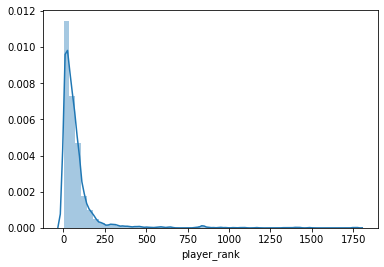

In [36]:
sns.distplot(tm_stats_train['player_rank'])
plt.show()

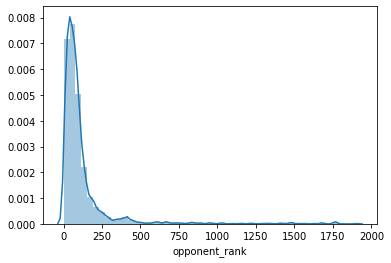

In [37]:
sns.distplot(tm_stats_train['opponent_rank'])
plt.show()

Create rankdiff feature

In [38]:
tm_stats_train['rank_diff'] = tm_stats_train['player_rank'] - tm_stats_train['opponent_rank']

In [39]:
tm_stats_train[['rank_diff', 'player_rank', 'opponent_rank']].head()

,rank_diff,player_rank,opponent_rank
0,-44.0,21.0,65.0
1,-111.0,23.0,134.0
2,-1382.0,147.0,1529.0
3,-19.0,3.0,22.0
4,-32.0,78.0,110.0


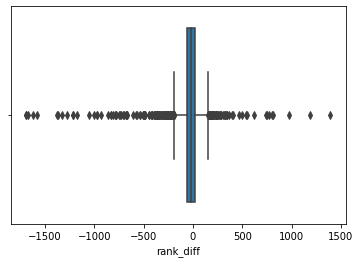

In [40]:
sns.boxplot(x=tm_stats_train['rank_diff'])

In [41]:
tm_stats_train['rank_diff'].describe()

count    2186.000000
mean      -37.395700
std       176.104601
min     -1692.000000
25%       -64.000000
50%       -20.000000
75%        21.000000
max      1392.000000
Name: rank_diff, dtype: float64

In [43]:
tm_stats_train[tm_stats_train['rank_diff'] < -1000]

,match_id,date,surface,level,round,best_of,player_id,opponent_id,player_rank,opponent_rank,...,o_avg_df,o_avg_sv_pt,o_avg_1st_in,o_avg_1st_won,o_avg_2nd_won,o_avg_sv_gms,o_avg_bp_sv,o_avg_bp_fc,Win,rank_diff
2,166516,05/02/2018,H,B,R32,3,5364,45397,147.0,1529.0,...,2.90,78.68,48.57,34.68,14.71,12.44,4.27,7.18,1,-1382.0
177,166397,03/02/2018,H,D,RR,3,5621,47166,208.0,1488.0,...,2.18,87.91,55.73,39.27,16.73,14.00,3.73,6.73,1,-1280.0
498,166438,03/02/2018,C,D,RR,3,6383,47244,458.0,1674.0,...,3.67,97.56,65.33,45.89,17.00,15.67,5.00,8.22,1,-1216.0
839,168394,27/08/2018,H,G,R128,5,5349,47169,55.0,1229.0,...,3.07,84.43,50.10,35.80,17.04,13.22,4.19,7.26,1,-1174.0
964,166430,03/02/2018,H,D,RR,3,5644,44551,94.0,1764.0,...,3.04,77.49,48.48,35.64,15.96,12.40,3.25,5.04,1,-1670.0
1314,168470,14/09/2018,C,D,RR,3,4546,45534,152.0,1474.0,...,2.68,75.23,46.88,35.60,15.45,12.28,3.14,4.99,1,-1322.0
1481,167051,07/04/2018,C,D,RR,3,6383,6136,433.0,1485.0,...,3.64,94.64,63.18,44.27,16.55,14.91,5.00,8.00,1,-1052.0
1641,166515,05/02/2018,H,B,R32,3,4794,46875,74.0,1766.0,...,2.98,79.82,48.12,34.80,16.56,12.49,3.79,6.18,1,-1692.0
1775,167009,06/04/2018,G,D,RR,3,4794,3499,83.0,1770.0,...,2.98,79.62,47.98,34.71,16.51,12.45,3.79,6.17,1,-1687.0
1804,169010,31/12/2018,H,B,R32,3,4198,22411,105.0,1473.0,...,2.93,79.66,48.17,33.72,15.59,12.24,4.32,7.22,1,-1368.0
